In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
drive_path = '/content/drive/Shared drives/Machine Learning Project/Project/' #set your google drive path

In [ ]:
#import the relevant libraries
import pandas as pd #data reading
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#code to ensure path
try:
  drive_path
except NameError:
  drive_path = ''

# load diabetes.csv dataset
df = pd.read_csv(drive_path + "CALON-PARLIMEN-PRU-15-MALAYSIA.csv")
df

Parlimen  NamaParlimen   Negeri  JumlahPengundiBerdaftar  \
0         P1  PADANG BESAR   PERLIS                    60147   
1         P1  PADANG BESAR   PERLIS                    60147   
2         P1  PADANG BESAR   PERLIS                    60147   
3         P1  PADANG BESAR   PERLIS                    60147   
4         P1  PADANG BESAR   PERLIS                    60147   
..       ...           ...      ...                      ...   
940     P221       LIMBANG  SARAWAK                    41999   
941     P221       LIMBANG  SARAWAK                    41999   
942     P222         LAWAS  SARAWAK                    33655   
943     P222         LAWAS  SARAWAK                    33655   
944     P222         LAWAS  SARAWAK                    33655   

     JumlahKeluarMengundi  %Mengundi  UndiRosak/Ditolak  \
0                   46059      76.58                694   
1                   46059      76.58                694   
2                   46059      76.58                694   
3                   46059      76.58                694   
4                   46059      76.58                694   
..                    ...        ...                ...   
940                 20130      47.93                228   
941                 20130      47.93                228   
942                 18495      54.95                198   
943                 18495      54.95                198   
944                 18495      54.95                198   

     KertasUnditidakdikembalikan  Majoriti  PengundiMelayu  ...  \
0                              0     12514           51775  ...   
1                              0     12514           51775  ...   
2                              0     12514           51775  ...   
3                              0     12514           51775  ...   
4                              0     12514           51775  ...   
..                           ...       ...             ...  ...   
940                          106      9998           10827  ...   
941                          106      9998           10827  ...   
942                           89      5677           12096  ...   
943                           89      5677           12096  ...   
944                           89      5677           12096  ...   

                  NamaCalon  Pakatan    Parti  JumlahCalonBertanding  \
0      MOHAMAD SAAD @ YAHYA       PH   AMANAH                      5   
1        ZAHIDA  ZARIK KHAN       BN     UMNO                      5   
2            RUSHDAN  RUSMI       PN      PAS                      5   
3              KO CHU LIANG  WARISAN  WARISAN                      5   
4      ZAHIDI ZAINUL ABIDIN    BEBAS    BEBAS                      5   
..                      ...      ...      ...                    ...   
940            RACHA BALANG       PH      PKR                      2   
941  DATUK HASBI HABIBOLLAH      GPS      PBB                      2   
942             JAPAR SUYUT       PH      PKR                      3   
943               BARU BIAN      PSB      PSB                      3   
944   DATUK HENRY SUM AGONG      GPS      PBB                      3   

     JumlahUndiCalon  Menang           NamaMPPRU14  JumlahUndiPRU14  \
0               7085       0  ZAHIDI ZAINUL ABIDIN            15032   
1              11753       0  ZAHIDI ZAINUL ABIDIN            15032   
2              24267       1  ZAHIDI ZAINUL ABIDIN            15032   
3                244       0  ZAHIDI ZAINUL ABIDIN            15032   
4               1939       0  ZAHIDI ZAINUL ABIDIN            15032   
..               ...     ...                   ...              ...   
940             4899       0      HASBI HABIBOLLAH            12589   
941            14897       1      HASBI HABIBOLLAH            12589   
942             1163       0       HENRY SUM AGONG            10037   
943             5684       0       HENRY SUM AGONG            10037   
944            11361       1       HENRY SUM AGONG            10037   

   

# **DATA EXPLORATION & CLEANING**

**data exploration**

In [ ]:
print('No. of records and attributes: ',df.shape)

No. of records and attributes:  (945, 31)


In [ ]:
print('List of attributes: ',df.columns)

List of attributes:  Index(['Parlimen', 'NamaParlimen', 'Negeri', 'JumlahPengundiBerdaftar',
       'JumlahKeluarMengundi', '%Mengundi', 'UndiRosak/Ditolak',
       'KertasUnditidakdikembalikan', 'Majoriti', 'PengundiMelayu',
       '%PengundiMelayu', 'PengundiCina', '%PengundiCina', 'PengundiIndia',
       '%PengundiIndia', 'PengundiBumi', '%PengundiBumi', 'PengundiOrangAsli',
       '%PengundiOrangAsli', 'PengundiLainLain', '%PengundiLainLain',
       'NamaCalon', 'Pakatan', 'Parti', 'JumlahCalonBertanding',
       'JumlahUndiCalon', 'Menang', 'NamaMPPRU14', 'JumlahUndiPRU14',
       'PakatanPRU14', 'MajoritiPRU14'],
      dtype='object')


In [ ]:
#columns renaming: BM to English
new_column_names = [
    'parliament', #Parlimen
    'parliament_name', #NamaParlimen
    'state', #Negeri
    'total_registered_voters',  #JumlahPengundiBerdaftar
    'total_draws',  #JumlahKeluarMengundi
    'voting_percentage',  #%Mengundi
    'rejected_votes',  #UndiRosak/Ditolak
    'unreturned_ballot_papers',  #KertasUnditidakdikembalikan
    'majority_count',  #Majoriti
    'malay',  #PengundiMelayu
    'malay_percentage',  #%PengundiMelayu
    'chinese',  #PengundiCina
    'chinese_percentage',  #%PengundiCina
    'indian',  #PengundiIndia
    'indian_percentage',  #%PengundiIndia
    'bumiputera',  #PengundiBumi
    'bumiputera_percentage',  #%PengundiBumi
    'natives',  #PengundiOrangAsli
    'natives_percentage',  #%PengundiOrangAsli
    'others',  #PengundiLainLain
    'others_percentage',  #%PengundiLainLain
    'candidate_name' , #NamaCalon
    'pakatan' , #Pakatan
    'parties' , #Parti
    'total_candidates_contested' , #JumlahCalonBertanding
    'total_votes_candidate' , #JumlahUndiCalon
    'win' , #Menang
    'MPPRU14' , #NamaMPPRU14
    'total_votes_MPPRU14' , #JumlahUndiPRU14
    'pakatan_PRU14' , #PakatanPRU14
    'majority_PRU14' #MajoritiPRU14
]

df.columns = new_column_names
print('Total number of columns after renaming:',len(df.columns))
print('List of attributes: ',df.columns)

Total number of columns after renaming: 31
List of attributes:  Index(['parliament', 'parliament_name', 'state', 'total_registered_voters',
       'total_draws', 'voting_percentage', 'rejected_votes',
       'unreturned_ballot_papers', 'majority_count', 'malay',
       'malay_percentage', 'chinese', 'chinese_percentage', 'indian',
       'indian_percentage', 'bumiputera', 'bumiputera_percentage', 'natives',
       'natives_percentage', 'others', 'others_percentage', 'candidate_name',
       'pakatan', 'parties', 'total_candidates_contested',
       'total_votes_candidate', 'win', 'MPPRU14', 'total_votes_MPPRU14',
       'pakatan_PRU14', 'majority_PRU14'],
      dtype='object')


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parliament                  945 non-null    object 
 1   parliament_name             945 non-null    object 
 2   state                       945 non-null    object 
 3   total_registered_voters     945 non-null    int64  
 4   total_draws                 945 non-null    int64  
 5   voting_percentage           945 non-null    float64
 6   rejected_votes              945 non-null    int64  
 7   unreturned_ballot_papers    945 non-null    int64  
 8   majority_count              945 non-null    int64  
 9   malay                       945 non-null    int64  
 10  malay_percentage            945 non-null    float64
 11  chinese                     945 non-null    int64  
 12  chinese_percentage          945 non-null    float64
 13  indian                      945 non

None

In [ ]:
df.describe()

total_registered_voters    total_draws  voting_percentage  \
count               945.000000     945.000000         945.000000   
mean             101727.619048   74499.384127          73.755079   
std               58196.791655   39152.623845          10.267477   
min               28290.000000       0.000000           0.000000   
25%               65719.000000   47604.000000          69.190000   
50%               92521.000000   67774.000000          76.340000   
75%              120299.000000   92005.000000          79.160000   
max              699394.000000  246795.000000         100.000000   

       rejected_votes  unreturned_ballot_papers  majority_count         malay  \
count      945.000000                945.000000      945.000000  9.450000e+02   
mean       748.525926                 93.993651    17763.798942  9.352296e+04   
std        346.924624                135.764455    19209.499242  7.087927e+05   
min          0.000000                  0.000000      100.000000  0.000000e+00   
25%        489.000000                  0.000000     3998.000000  2.006200e+04   
50%        733.000000                  0.000000    11598.000000  5.315600e+04   
75%        907.000000                155.000000    26406.000000  8.103900e+04   
max       1930.000000                657.000000   124619.000000  1.262994e+07   

       malay_percentage       chinese  chinese_percentage  ...  \
count        945.000000  9.450000e+02          945.000000  ...   
mean          87.307746  1.345970e+05          116.161492  ...   
std          623.558214  1.826957e+06         1607.530773  ...   
min            0.000000  1.080000e+02            0.180000  ...   
25%           26.810000  4.580000e+03            7.050000  ...   
50%           57.670000  1.743300e+04           17.990000  ...   
75%           78.030000  3.504400e+04           34.520000  ...   
max        11118.000000  3.246773e+07        28581.000000  ...   

       bumiputera_percentage       natives  natives_percentage        others  \
count             945.000000    945.000000          945.000000    945.000000   
mean               26.325302    581.131217            0.726635   2425.387302   
std               257.012638   1810.942744            2.628670   2917.043480   
min                 0.000000      0.000000            0.000000      0.000000   
25%                 0.000000      0.000000            0.000000    703.000000   
50%                 0.000000      0.000000            0.000000   1194.000000   
75%                 0.000000      0.000000            0.000000   3372.000000   
max              5567.000000  13327.000000           28.960000  19516.000000   

       others_percentage  total_candidates_contested  total_votes_candidate  \
count         945.000000                  945.000000             945.000000   
mean            2.567894                    4.635979           16526.829630   
std             4.637464                    1.387282           19225.129236   
min             0.000000                    2.000000              20.000000   
25%             0.760000                    4.000000            1154.000000   
50%             1.480000                    4.000000           11593.000000   
75%             3.010000                    5.000000           23549.000000   
max            56.000000                    9.000000          142875.000000   

              win  total_votes_MPPRU14  majority_PRU14  
count  945.000000           945.000000      945.000000  
mean     0.233862         32914.438095    15675.142857  
std      0.423510         19734.397702    18293.253429  
min      0.000000          5834.000000       45.000000  
25%      0.000000         18547.000000     3292.000000  
50%      0.000000         28152.000000     7992.000000  
75%      0.000000         42997.000000    23053.000000  
max      1.000000        121283.000000   106903.000000  

[8 rows x 23 columns]

In [ ]:
df.dtypes

parliament                     object
parliament_name                object
state                          object
total_registered_voters         int64
total_draws                     int64
voting_percentage             float64
rejected_votes                  int64
unreturned_ballot_papers        int64
majority_count                  int64
malay                           int64
malay_percentage              float64
chinese                         int64
chinese_percentage            float64
indian                          int64
indian_percentage             float64
bumiputera                      int64
bumiputera_percentage         float64
natives                         int64
natives_percentage            float64
others                          int64
others_percentage             float64
candidate_name                 object
pakatan                        object
parties                        object
total_candidates_contested      int64
total_votes_candidate           int64
win         

In [ ]:
df.select_dtypes(['int64','float64']).describe()

total_registered_voters    total_draws  voting_percentage  \
count               945.000000     945.000000         945.000000   
mean             101727.619048   74499.384127          73.755079   
std               58196.791655   39152.623845          10.267477   
min               28290.000000       0.000000           0.000000   
25%               65719.000000   47604.000000          69.190000   
50%               92521.000000   67774.000000          76.340000   
75%              120299.000000   92005.000000          79.160000   
max              699394.000000  246795.000000         100.000000   

       rejected_votes  unreturned_ballot_papers  majority_count         malay  \
count      945.000000                945.000000      945.000000  9.450000e+02   
mean       748.525926                 93.993651    17763.798942  9.352296e+04   
std        346.924624                135.764455    19209.499242  7.087927e+05   
min          0.000000                  0.000000      100.000000  0.000000e+00   
25%        489.000000                  0.000000     3998.000000  2.006200e+04   
50%        733.000000                  0.000000    11598.000000  5.315600e+04   
75%        907.000000                155.000000    26406.000000  8.103900e+04   
max       1930.000000                657.000000   124619.000000  1.262994e+07   

       malay_percentage       chinese  chinese_percentage  ...  \
count        945.000000  9.450000e+02          945.000000  ...   
mean          87.307746  1.345970e+05          116.161492  ...   
std          623.558214  1.826957e+06         1607.530773  ...   
min            0.000000  1.080000e+02            0.180000  ...   
25%           26.810000  4.580000e+03            7.050000  ...   
50%           57.670000  1.743300e+04           17.990000  ...   
75%           78.030000  3.504400e+04           34.520000  ...   
max        11118.000000  3.246773e+07        28581.000000  ...   

       bumiputera_percentage       natives  natives_percentage        others  \
count             945.000000    945.000000          945.000000    945.000000   
mean               26.325302    581.131217            0.726635   2425.387302   
std               257.012638   1810.942744            2.628670   2917.043480   
min                 0.000000      0.000000            0.000000      0.000000   
25%                 0.000000      0.000000            0.000000    703.000000   
50%                 0.000000      0.000000            0.000000   1194.000000   
75%                 0.000000      0.000000            0.000000   3372.000000   
max              5567.000000  13327.000000           28.960000  19516.000000   

       others_percentage  total_candidates_contested  total_votes_candidate  \
count         945.000000                  945.000000             945.000000   
mean            2.567894                    4.635979           16526.829630   
std             4.637464                    1.387282           19225.129236   
min             0.000000                    2.000000              20.000000   
25%             0.760000                    4.000000            1154.000000   
50%             1.480000                    4.000000           11593.000000   
75%             3.010000                    5.000000           23549.000000   
max            56.000000                    9.000000          142875.000000   

              win  total_votes_MPPRU14  majority_PRU14  
count  945.000000           945.000000      945.000000  
mean     0.233862         32914.438095    15675.142857  
std      0.423510         19734.397702    18293.253429  
min      0.000000          5834.000000       45.000000  
25%      0.000000         18547.000000     3292.000000  
50%      0.000000         28152.000000     7992.000000  
75%      0.000000         42997.000000    23053.000000  
max      1.000000        121283.000000   106903.000000  

[8 rows x 23 columns]

In [ ]:
df.select_dtypes(['object']).describe()

parliament parliament_name     state        candidate_name pakatan  \
count         945             945       945                   945     945   
unique        222             222        15                   945      27   
top          P115            BATU  SELANGOR  MOHAMAD SAAD @ YAHYA      PH   
freq           10              10       124                     1     214   

       parties      MPPRU14 pakatan_PRU14  
count      945          945           945  
unique      54          221             6  
top       UMNO  LIM LIP ENG            PH  
freq       116           11           505

In [ ]:
cat_attributes = df.select_dtypes(['object']).columns
for i in cat_attributes:
  values = df[i].unique().tolist()
  print(i,': ',values)

parliament :  ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'P38', 'P39', 'P40', 'P41', 'P42', 'P43', 'P44', 'P45', 'P46', 'P47', 'P48', 'P49', 'P50', 'P51', 'P52', 'P53', 'P54', 'P55', 'P56', 'P57', 'P58', 'P59', 'P60', 'P61', 'P62', 'P63', 'P64', 'P65', 'P66', 'P67', 'P68', 'P69', 'P70', 'P71', 'P72', 'P73', 'P74', 'P75', 'P76', 'P77', 'P78', 'P79', 'P80', 'P81', 'P82', 'P83', 'P84', 'P85', 'P86', 'P87', 'P88', 'P89', 'P90', 'P91', 'P92', 'P93', 'P94', 'P95', 'P96', 'P97', 'P98', 'P99', 'P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112', 'P113', 'P114', 'P115', 'P116', 'P117', 'P118', 'P119', 'P120', 'P121', 'P122', 'P123', 'P124\xa0BANDAR', 'P125', 'P126', 'P127', 'P128', 'P129', 'P130', 'P131', 'P132', 'P133', 'P134', 'P135', 'P1

**Missing values checking**

In [ ]:
df.isna().sum()

parliament                    0
parliament_name               0
state                         0
total_registered_voters       0
total_draws                   0
voting_percentage             0
rejected_votes                0
unreturned_ballot_papers      0
majority_count                0
malay                         0
malay_percentage              0
chinese                       0
chinese_percentage            0
indian                        0
indian_percentage             0
bumiputera                    0
bumiputera_percentage         0
natives                       0
natives_percentage            0
others                        0
others_percentage             0
candidate_name                0
pakatan                       0
parties                       0
total_candidates_contested    0
total_votes_candidate         0
win                           0
MPPRU14                       0
total_votes_MPPRU14           0
pakatan_PRU14                 0
majority_PRU14                0
dtype: i

**Duplicate values checking**

In [ ]:
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [ ]:
df.nunique()

parliament                    222
parliament_name               222
state                          15
total_registered_voters       222
total_draws                   222
voting_percentage             207
rejected_votes                203
unreturned_ballot_papers       94
majority_count                220
malay                         221
malay_percentage              220
chinese                       222
chinese_percentage            219
indian                        214
indian_percentage             175
bumiputera                     58
bumiputera_percentage          57
natives                        53
natives_percentage             49
others                        217
others_percentage             164
candidate_name                945
pakatan                        27
parties                        54
total_candidates_contested      8
total_votes_candidate         909
win                             2
MPPRU14                       221
total_votes_MPPRU14           221
pakatan_PRU14 

In [ ]:
df['candidate_name'].count()

945

# **EDA - visualization, tables**

In [ ]:
import seaborn as sns
sns.set()
%matplotlib inline

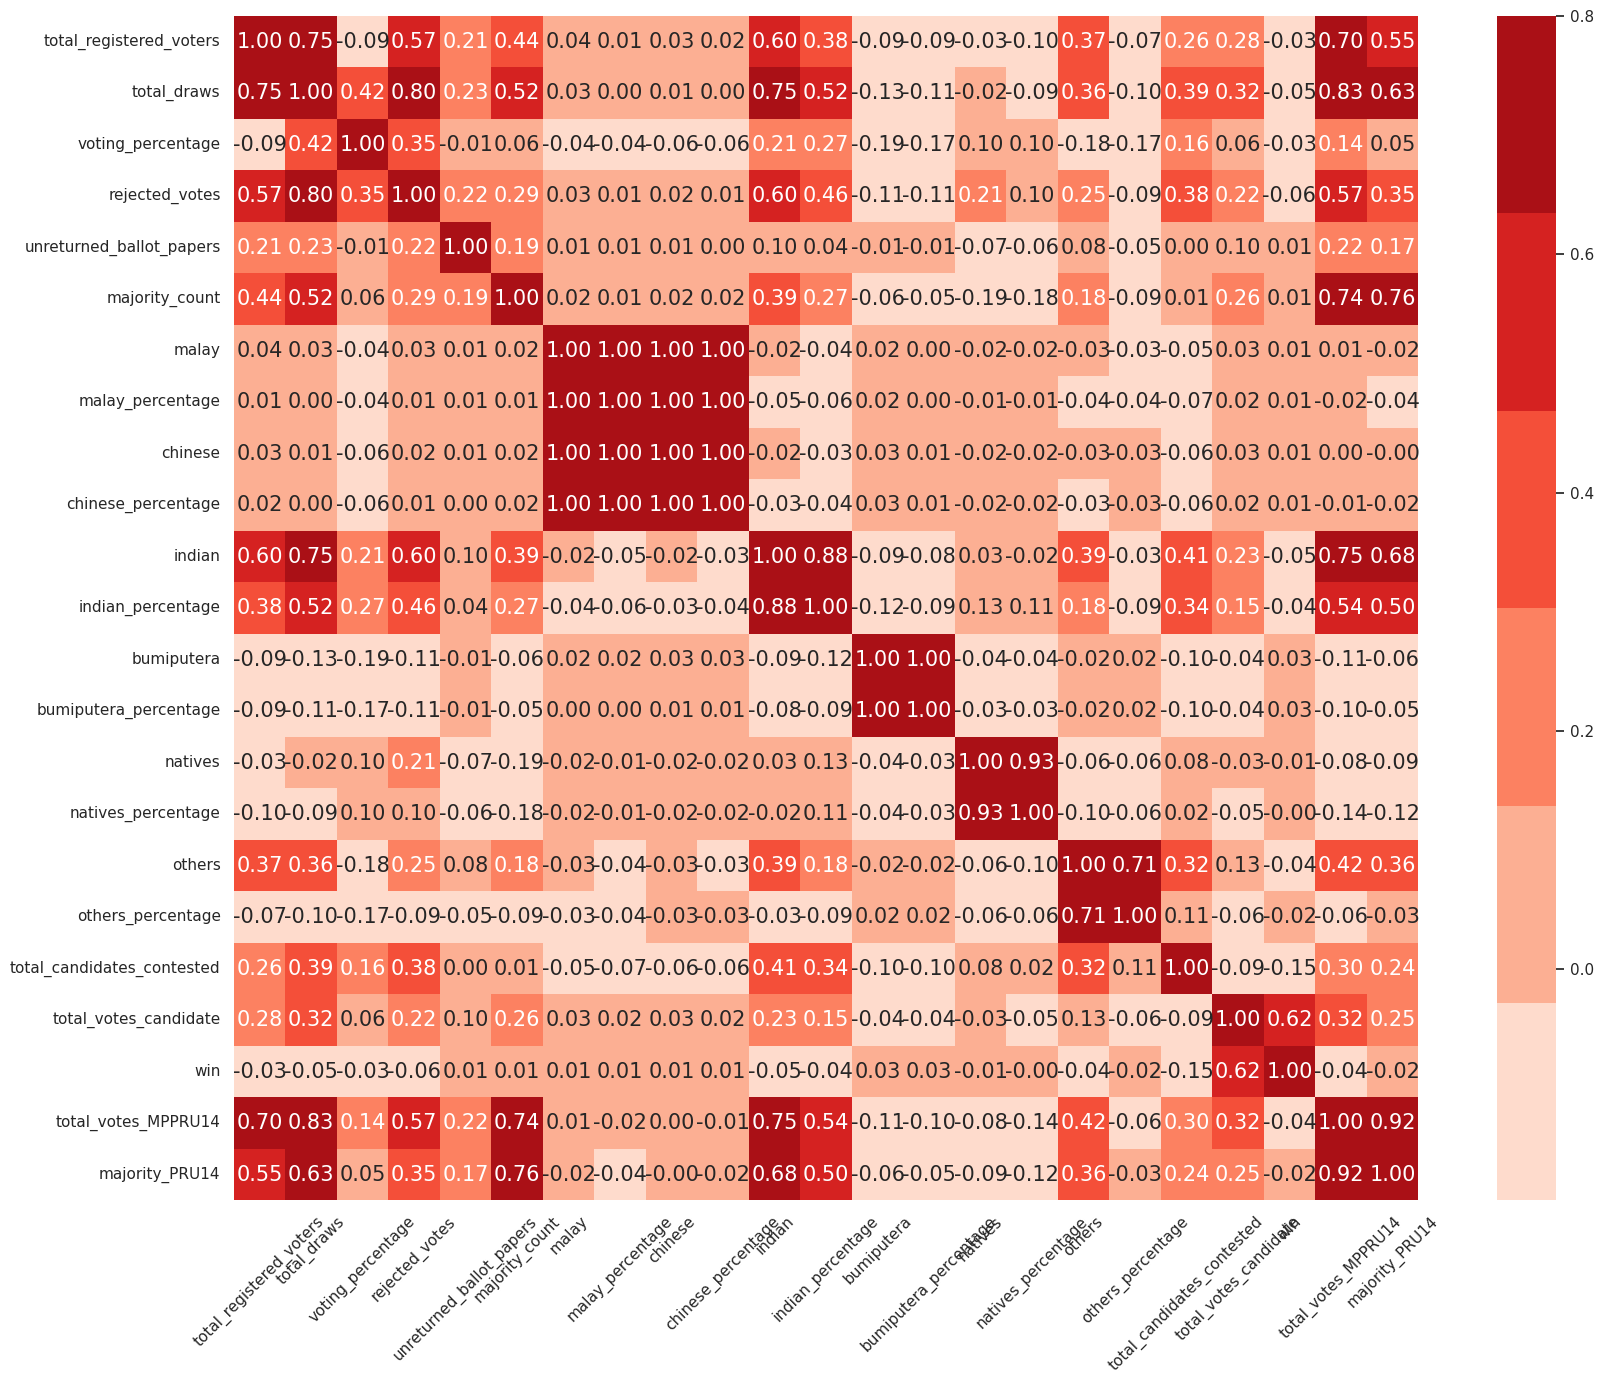

In [ ]:
plt.figure(figsize=(18, 14))
sns.heatmap(df.corr(numeric_only=True), vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

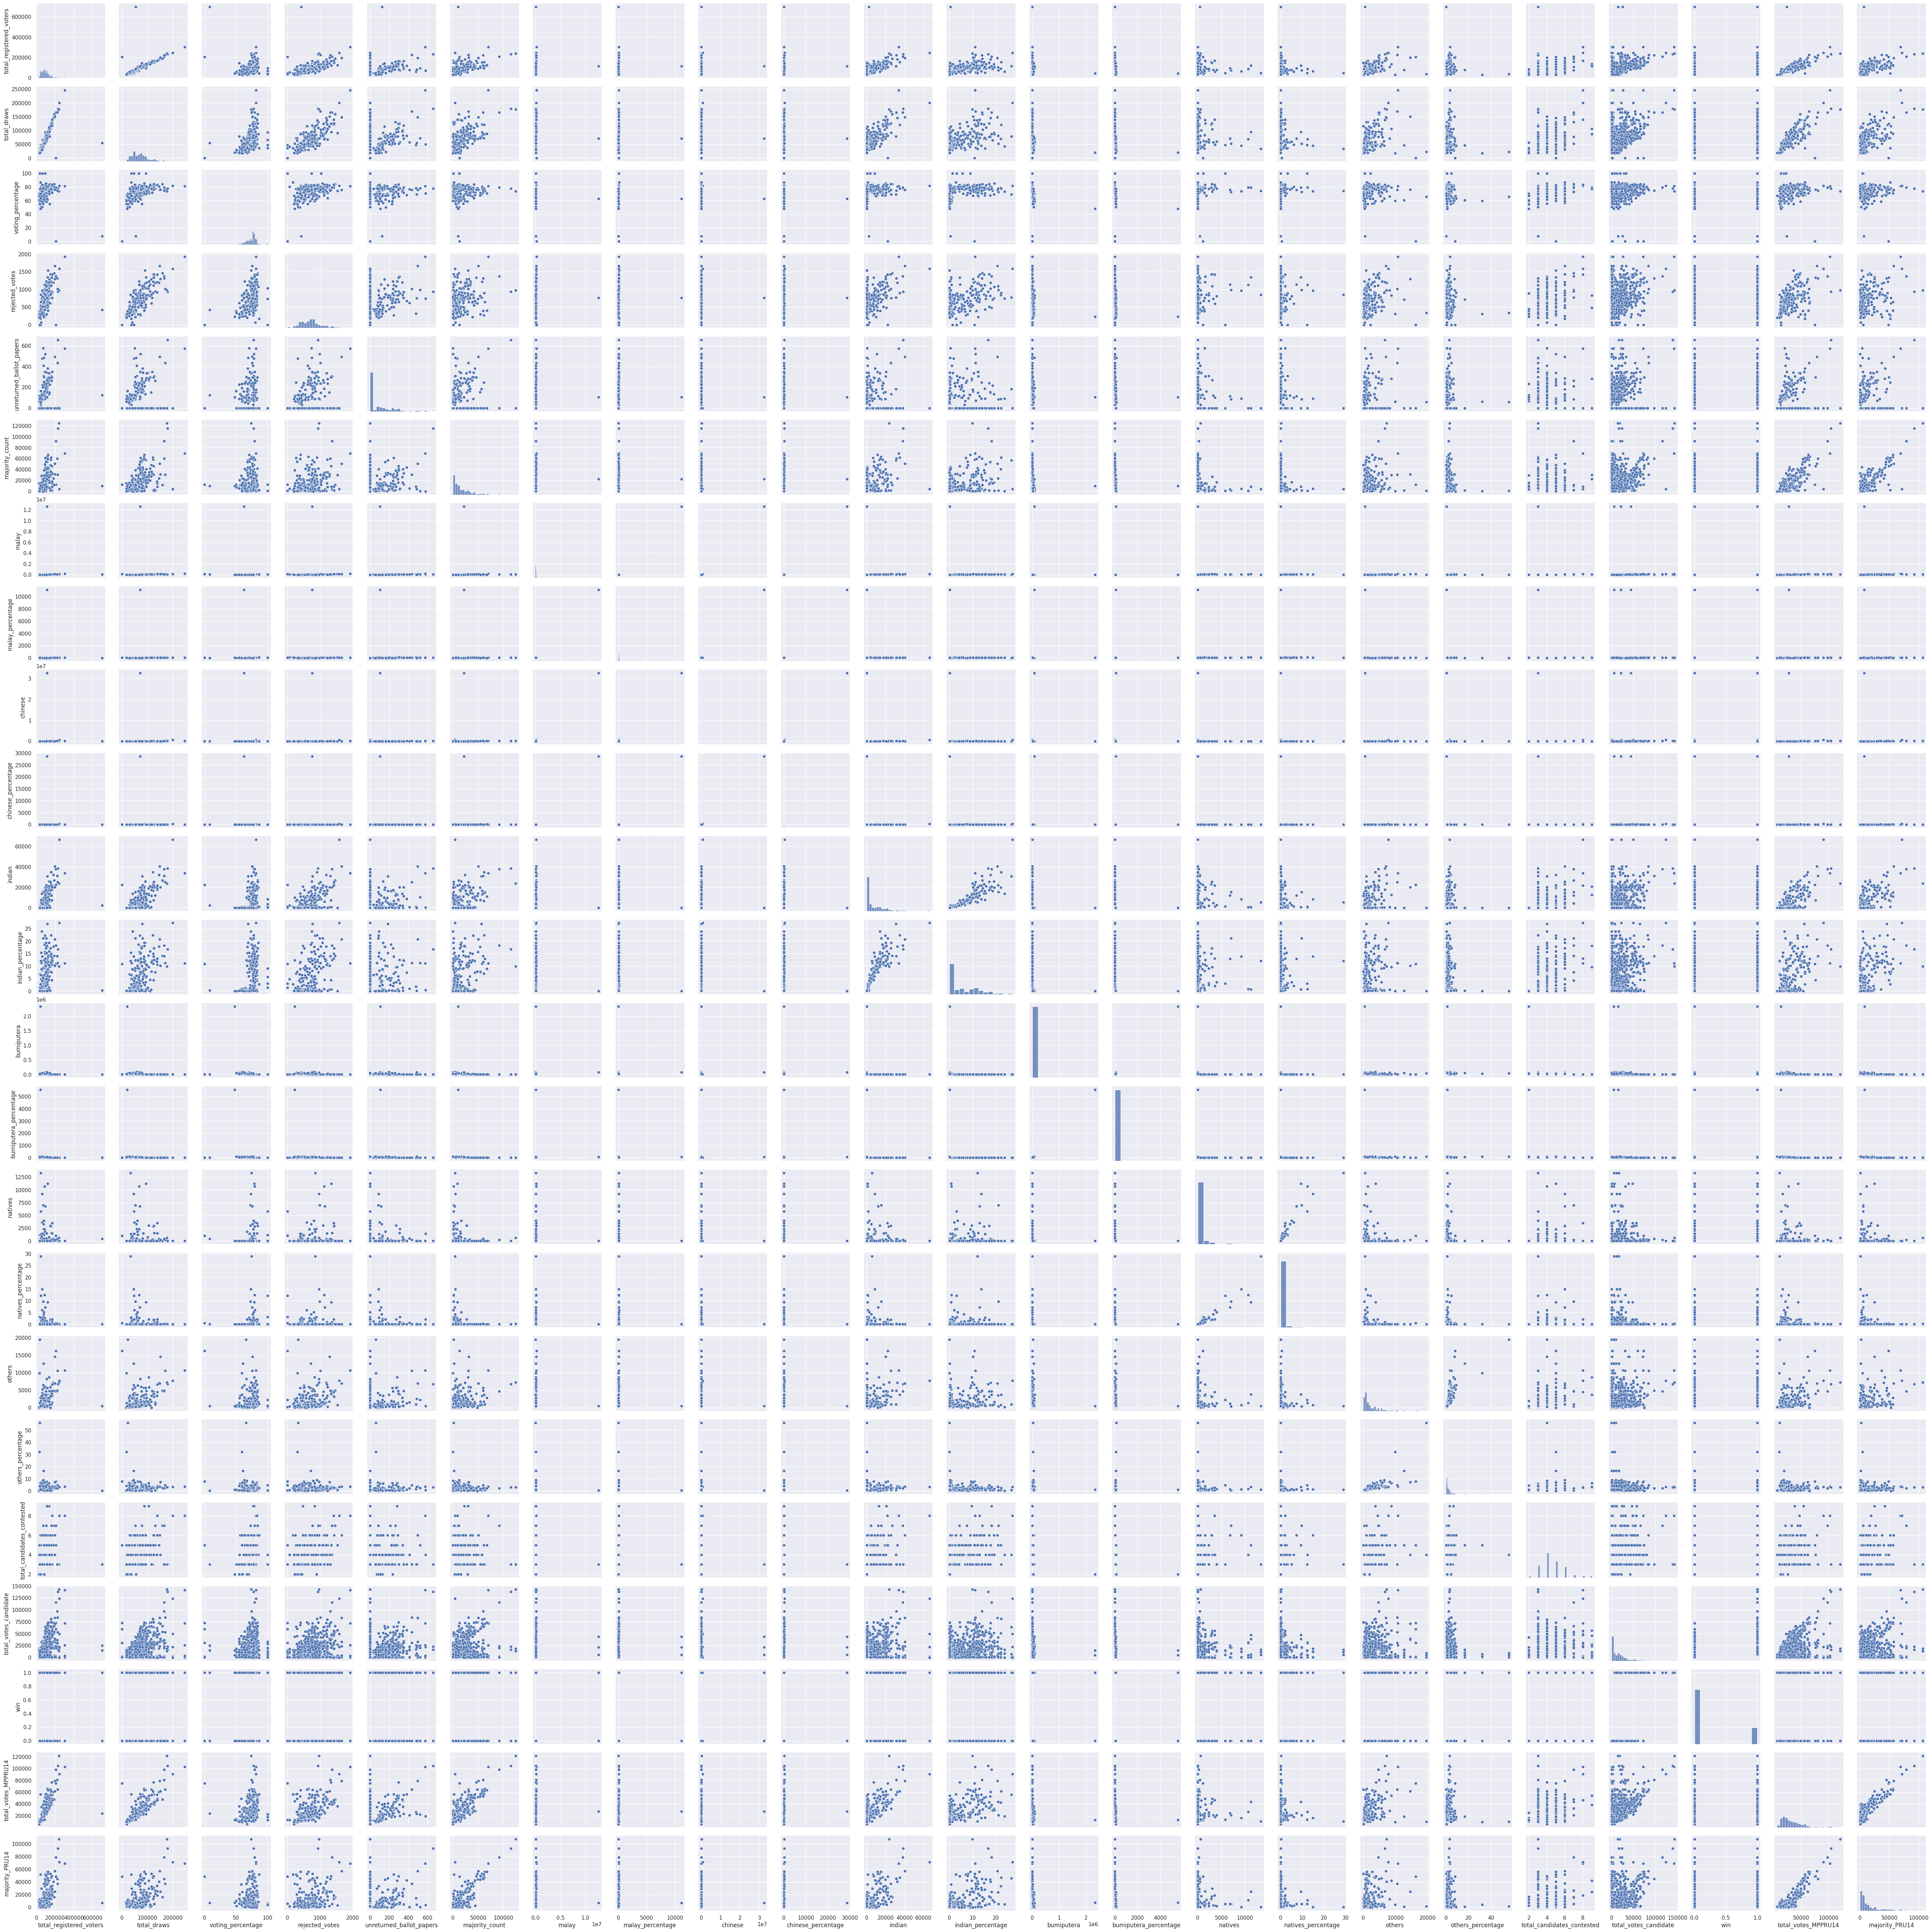

In [ ]:
sns.pairplot(df.select_dtypes(['int64','float64']))

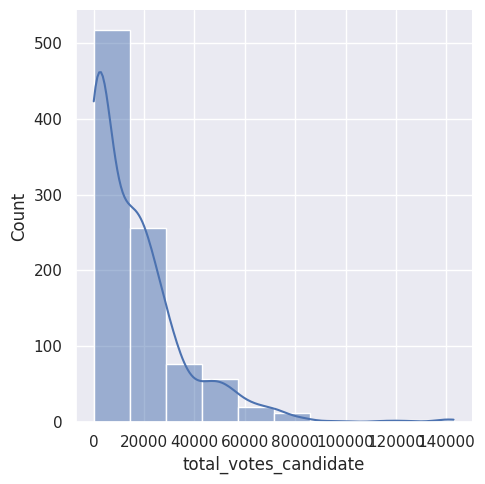

In [ ]:
#total votes count
sns.displot(df["total_votes_candidate"], bins=10, kde=True)

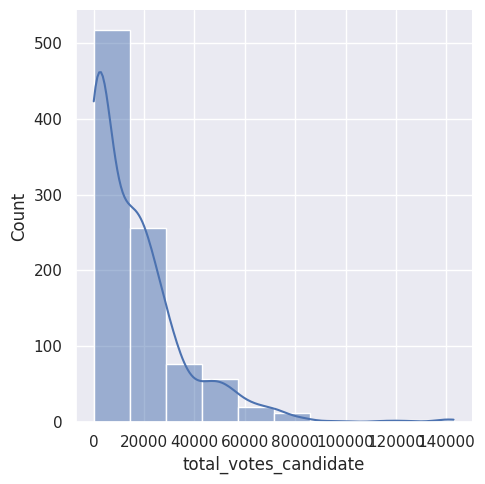

In [ ]:
#total votes count
sns.displot(df["total_votes_candidate"], bins=10, kde=True)

<Axes: >

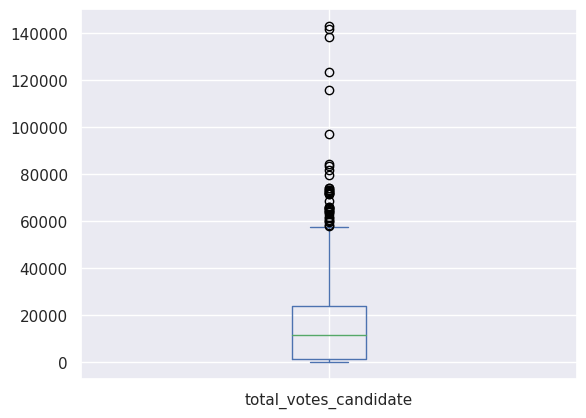

In [ ]:
df[["total_votes_candidate"]].plot(kind="box")

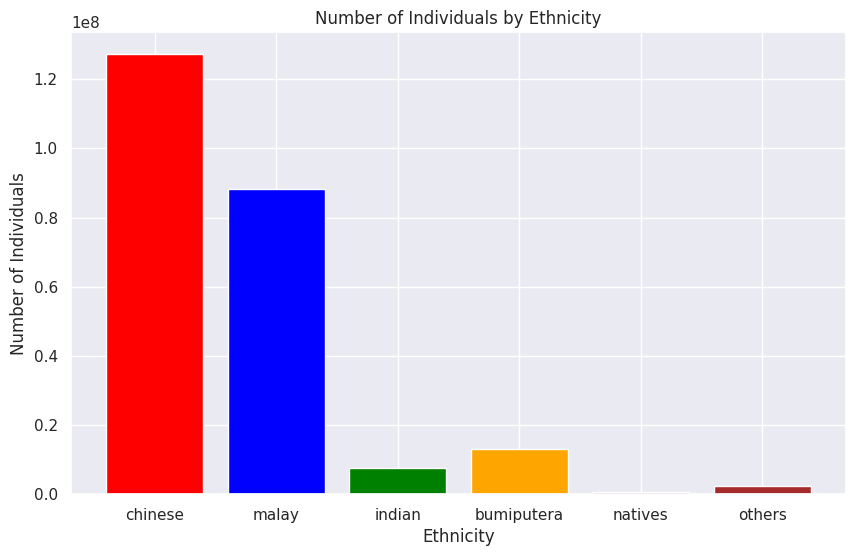

In [ ]:
import matplotlib.pyplot as plt

#ethnic columns
ethnicity_columns = ['chinese', 'malay', 'indian', 'bumiputera', 'natives', 'others']
df_ethnicity = df[ethnicity_columns]

# Calculate the sum of individuals for each ethnicity
values = df_ethnicity.sum().values.tolist()

plt.figure(figsize=(10, 6))
plt.bar(ethnicity_columns, values, color=['red', 'blue', 'green', 'orange', 'purple', 'brown'])
plt.title('Number of Individuals by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Individuals')
plt.show()


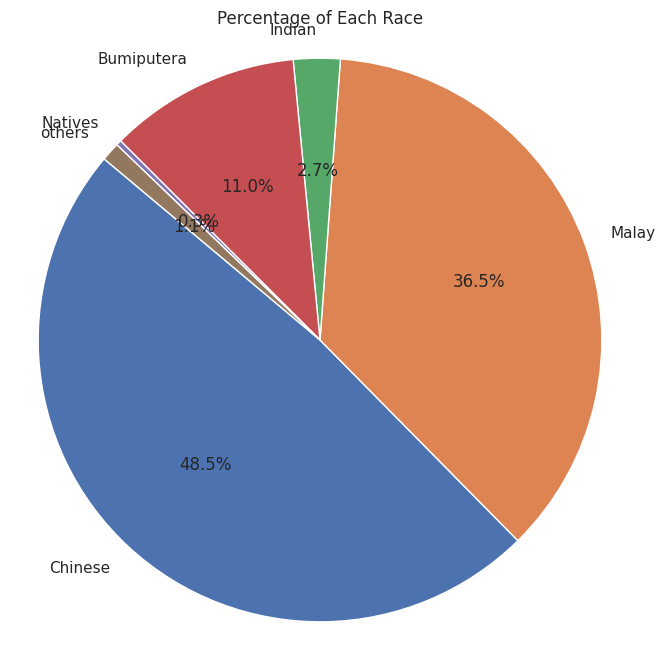

In [ ]:
race_columns = ['chinese_percentage', 'malay_percentage', 'indian_percentage', 'bumiputera_percentage', 'natives_percentage', 'others_percentage']
race_labels = ['Chinese', 'Malay', 'Indian', 'Bumiputera', 'Natives', 'others']
race_percentages = [df[col].sum() for col in race_columns]

plt.figure(figsize=(8, 8))
plt.pie(race_percentages, labels=race_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Each Race')
plt.axis('equal')
plt.show()

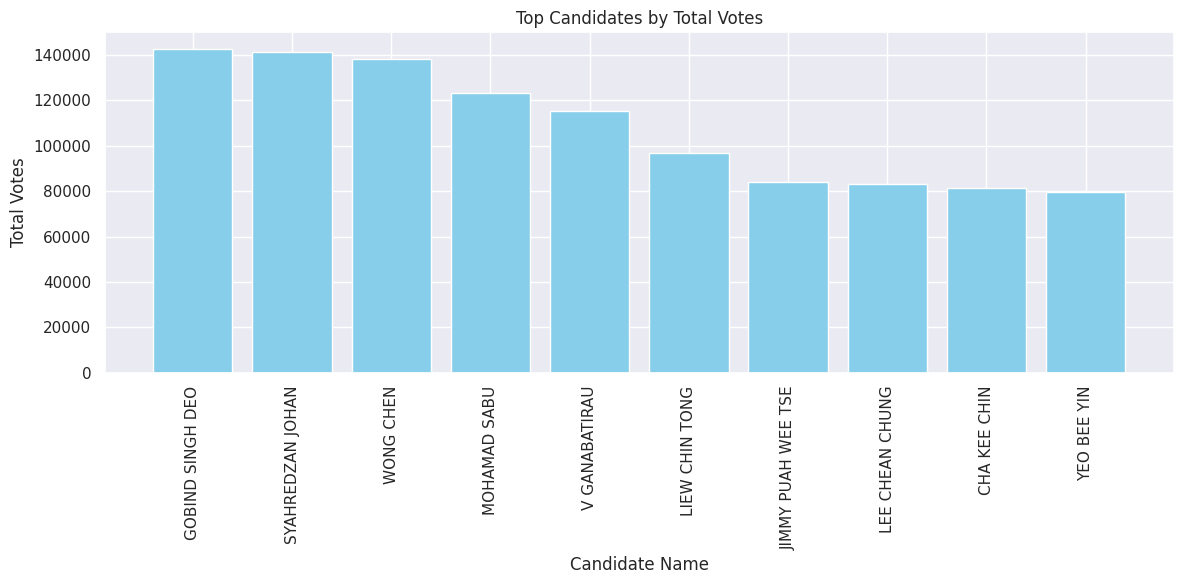

In [ ]:
df_sorted = df.sort_values(by='total_votes_candidate', ascending=False)

# top 10 candidate names and total votes
top_candidates = df_sorted.head(10)[['candidate_name', 'total_votes_candidate']]

plt.figure(figsize=(12, 6))
plt.bar(top_candidates['candidate_name'], top_candidates['total_votes_candidate'], color='skyblue')
plt.title('Top Candidates by Total Votes')
plt.xlabel('Candidate Name')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
pip install tabulate


In [ ]:
from tabulate import tabulate

top_candidates = df_sorted[['candidate_name', 'total_votes_candidate']].head(10)

table = tabulate(top_candidates, headers='keys', tablefmt='grid')

print(table)

+-----+--------------------+-------------------------+
|     | candidate_name     |   total_votes_candidate |
+=====+====================+=========================+
| 464 | GOBIND SINGH DEO   |                  142875 |
+-----+--------------------+-------------------------+
| 449 | SYAHREDZAN JOHAN   |                  141568 |
+-----+--------------------+-------------------------+
| 457 | WONG CHEN          |                  138259 |
+-----+--------------------+-------------------------+
| 496 | MOHAMAD SABU       |                  123306 |
+-----+--------------------+-------------------------+
| 490 | V GANABATIRAU      |                  115539 |
+-----+--------------------+-------------------------+
| 717 | LIEW CHIN TONG     |                   96819 |
+-----+--------------------+-------------------------+
| 701 | JIMMY PUAH WEE TSE |                   83959 |
+-----+--------------------+-------------------------+
| 463 | LEE CHEAN CHUNG    |                   83311 |
+-----+---

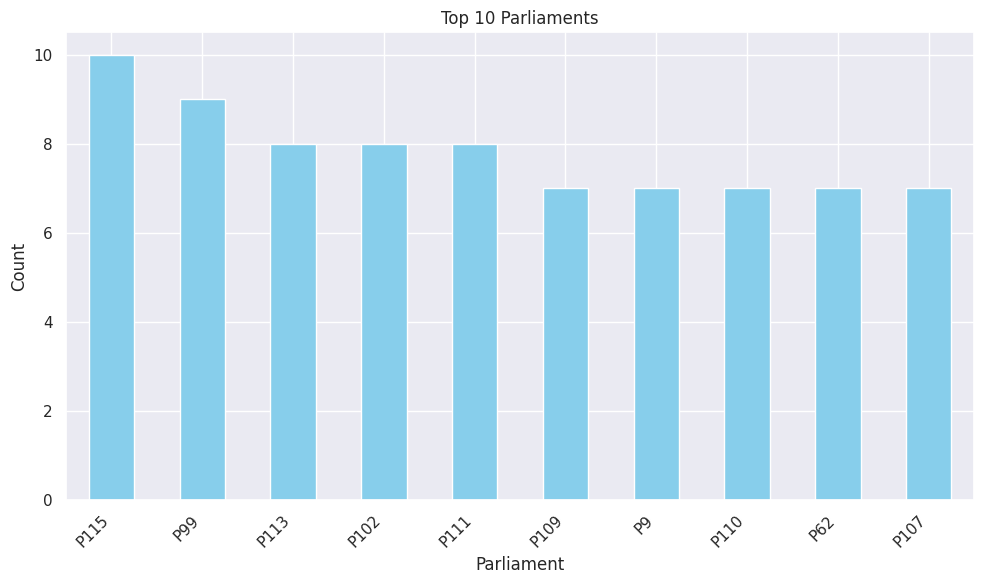

In [ ]:
parliament_counts = df['parliament'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
parliament_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Parliaments')
plt.xlabel('Parliament')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
parliament_counts_df = parliament_counts.reset_index()
parliament_counts_df.columns = ['Parliament', 'Count']

# Convert DataFrame to a tabular format
table = tabulate(parliament_counts_df, headers='keys', tablefmt='grid')

# Display the table
print(table)

+----+--------------+---------+
|    | Parliament   |   Count |
+====+==============+=========+
|  0 | P115         |      10 |
+----+--------------+---------+
|  1 | P99          |       9 |
+----+--------------+---------+
|  2 | P113         |       8 |
+----+--------------+---------+
|  3 | P102         |       8 |
+----+--------------+---------+
|  4 | P111         |       8 |
+----+--------------+---------+
|  5 | P109         |       7 |
+----+--------------+---------+
|  6 | P9           |       7 |
+----+--------------+---------+
|  7 | P110         |       7 |
+----+--------------+---------+
|  8 | P62          |       7 |
+----+--------------+---------+
|  9 | P107         |       7 |
+----+--------------+---------+


In [ ]:
# Count the occurrences of each parliament
parliament_counts1 = df.groupby(['state', 'parliament_name', 'parliament']).size().reset_index(name='Count')

table = tabulate(parliament_counts1, headers='keys', tablefmt='grid')

print(table)


+-----+----------------------------------+---------------------------+--------------+---------+
|     | state                            | parliament_name           | parliament   |   Count |
+=====+==================================+===========================+==============+=========+
|   0 | JOHOR                            | AYER HITAM                | P148         |       3 |
+-----+----------------------------------+---------------------------+--------------+---------+
|   1 | JOHOR                            | BAKRI                     | P145         |       4 |
+-----+----------------------------------+---------------------------+--------------+---------+
|   2 | JOHOR                            | BATU PAHAT                | P150         |       5 |
+-----+----------------------------------+---------------------------+--------------+---------+
|   3 | JOHOR                            | ISKANDAR PUTERI           | P162         |       3 |
+-----+---------------------------------

In [ ]:
# Filter the DataFrame to include only rows where the state is 'Selangor'
df_selangor = df[df['state'] == 'SELANGOR']

# Count the occurrences of each parliament in Selangor
parliament_counts2 = df_selangor.groupby(['state', 'parliament_name', 'parliament']).size().reset_index(name='Count')

table = tabulate(parliament_counts2, headers='keys', tablefmt='grid')

print(table)

+----+----------+-------------------+--------------+---------+
|    | state    | parliament_name   | parliament   |   Count |
+====+==========+===================+==============+=========+
|  0 | SELANGOR | AMPANG            | P99          |       9 |
+----+----------+-------------------+--------------+---------+
|  1 | SELANGOR | BANGI             | P102         |       8 |
+----+----------+-------------------+--------------+---------+
|  2 | SELANGOR | DAMANSARA         | P106         |       3 |
+----+----------+-------------------+--------------+---------+
|  3 | SELANGOR | GOMBAK            | P98          |       5 |
+----+----------+-------------------+--------------+---------+
|  4 | SELANGOR | HULU LANGAT       | P101         |       6 |
+----+----------+-------------------+--------------+---------+
|  5 | SELANGOR | HULU SELANGOR     | P94          |       6 |
+----+----------+-------------------+--------------+---------+
|  6 | SELANGOR | KAPAR             | P109         |   

In [ ]:
parliament_all = df['parliament'].value_counts()
print(parliament_all.max())
print(parliament_all.min())

10
2


In [ ]:
state_parliament_counts = df.groupby('state')['parliament'].nunique().reset_index()
state_parliament_counts.columns = ['State', 'Total Parliaments']

table = tabulate(state_parliament_counts, headers='keys', tablefmt='grid')

print(table)

+----+----------------------------------+---------------------+
|    | State                            |   Total Parliaments |
+====+==================================+=====================+
|  0 | JOHOR                            |                  26 |
+----+----------------------------------+---------------------+
|  1 | KEDAH                            |                  15 |
+----+----------------------------------+---------------------+
|  2 | KELANTAN                         |                  14 |
+----+----------------------------------+---------------------+
|  3 | LABUAN                           |                   1 |
+----+----------------------------------+---------------------+
|  4 | MELAKA                           |                   6 |
+----+----------------------------------+---------------------+
|  5 | NEGERI SEMBILAN                  |                   8 |
+----+----------------------------------+---------------------+
|  6 | PAHANG                           

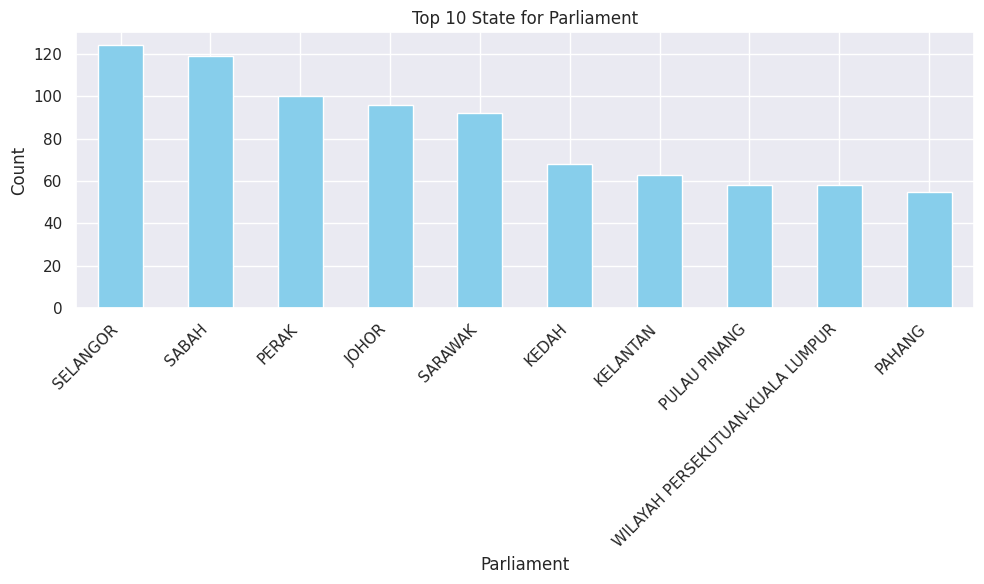

In [ ]:
parliament_counts = df['state'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
parliament_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 State for Parliament')
plt.xlabel('Parliament')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **DATA PREPROCESSING**

In [ ]:
print(df['win'].value_counts())

0    724
1    221
Name: win, dtype: int64


<Axes: xlabel='win', ylabel='count'>

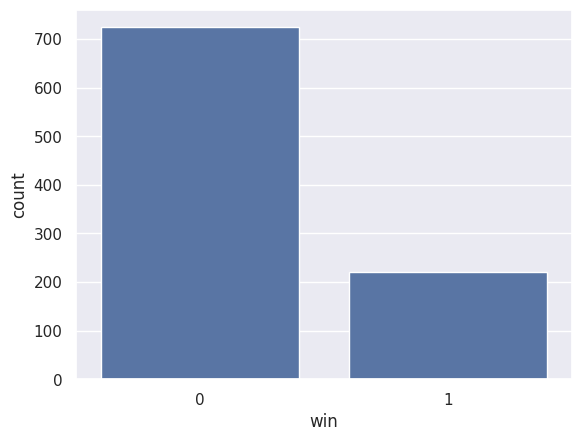

In [ ]:
sns.countplot(x='win', data = df)

In [ ]:
import imblearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# to check the range of the target variable
print('min num:', df['win'].min())
print('max num:', df['win'].max())

min num: 0
max num: 1


**min-max scaling**

In [ ]:
# SMOTE
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

# Min Max Normalization on the features (without target)
from sklearn.preprocessing import MinMaxScaler
X = df.drop("win", 1)
y = df["win"]
features = X.columns

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
X_numeric = X[numeric_columns]

min_max_scaler = MinMaxScaler()
x_new = min_max_scaler.fit_transform(X_numeric)
x_new = pd.DataFrame(x_new, columns = numeric_columns)
x_new


<ipython-input-44-399c6fcea846>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop("win", 1)


total_registered_voters  total_draws  voting_percentage  rejected_votes  \
0                   0.047470     0.186629             0.7658        0.359585   
1                   0.047470     0.186629             0.7658        0.359585   
2                   0.047470     0.186629             0.7658        0.359585   
3                   0.047470     0.186629             0.7658        0.359585   
4                   0.047470     0.186629             0.7658        0.359585   
..                       ...          ...                ...             ...   
940                 0.020428     0.081566             0.4793        0.118135   
941                 0.020428     0.081566             0.4793        0.118135   
942                 0.007994     0.074941             0.5495        0.102591   
943                 0.007994     0.074941             0.5495        0.102591   
944                 0.007994     0.074941             0.5495        0.102591   

     unreturned_ballot_papers  majority_count     malay  malay_percentage  \
0                    0.000000        0.099696  0.004099          0.007742   
1                    0.000000        0.099696  0.004099          0.007742   
2                    0.000000        0.099696  0.004099          0.007742   
3                    0.000000        0.099696  0.004099          0.007742   
4                    0.000000        0.099696  0.004099          0.007742   
..                        ...             ...       ...               ...   
940                  0.161339        0.079490  0.000857          0.002319   
941                  0.161339        0.079490  0.000857          0.002319   
942                  0.135464        0.044788  0.000958          0.003233   
943                  0.135464        0.044788  0.000958          0.003233   
944                  0.135464        0.044788  0.000958          0.003233   

      chinese  chinese_percentage  ...  bumiputera  bumiputera_percentage  \
0    0.000146            0.000276  ...     0.00000               0.000000   
1    0.000146            0.000276  ...     0.00000               0.000000   
2    0.000146            0.000276  ...     0.00000               0.000000   
3    0.000146            0.000276  ...     0.00000               0.000000   
4    0.000146            0.000276  ...     0.00000               0.000000   
..        ...                 ...  ...         ...                    ...   
940  0.000222            0.000604  ...     1.00000               1.000000   
941  0.000222            0.000604  ...     1.00000               1.000000   
942  0.000094            0.000322  ...     0.00727               0.009073   
943  0.000094            0.000322  ...     0.00727               0.009073   
944  0.000094            0.000322  ...     0.00727               0.009073   

     natives  natives_percentage    others  others_percentage  \
0        0.0                 0.0  0.156231           0.090536   
1        0.0                 0.0  0.156231           0.090536   
2        0.0                 0.0  0.156231           0.090536   
3        0.0                 0.0  0.156231           0.090536   
4        0.0                 0.0  0.156231           0.090536   
..       ...                 ...       ...                ...   
940      0.0                 0.0  0.021726           0.018036   
941      0.0                 0.0  0.021726           0.018036   
942      0.0                 0.0  0.068969           0.071429   
943      0.0                 0.0  0.068969           0.071429   
944      0.0                 0.0  0.068969           0.071429   

     total_candidates_contested  total_votes_candidate  total_votes_MPPRU14  \
0                      0.428571               0.049456             0.079672   
1                      0.428571               0.082132             0.079672   
2                      0.428571               0.169732             0.079672   
3                      0.428571               0.001568             0.079672   
4                 

Dataset Splitting

*set 1*

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)

0    584
1    172
Name: win, dtype: int64
0    140
1     49
Name: win, dtype: int64


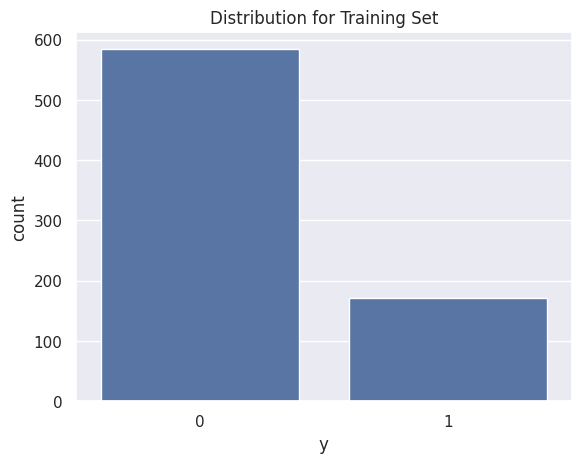

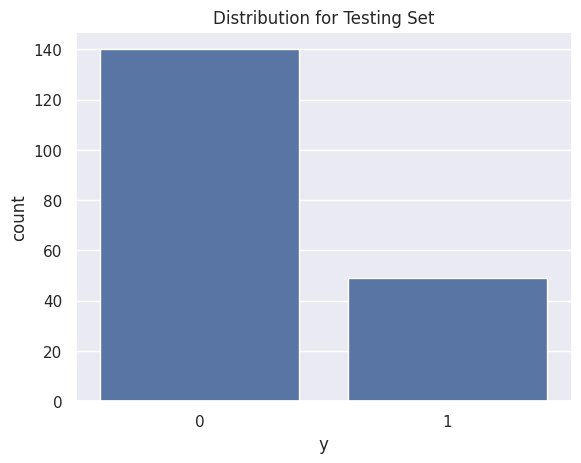

In [ ]:
#visualize classes after splitting
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_train}))
plt.title('Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='y', data = pd.DataFrame({'y':y_test}))
plt.title('Distribution for Testing Set')
plt.show()

SMOTE

In [ ]:
# Apply SMOTE to the training set only
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

1    584
0    584
Name: win, dtype: int64


Text(0.5, 1.0, 'Class Distribution for Training Set After SMOTE (Without Sorting)')

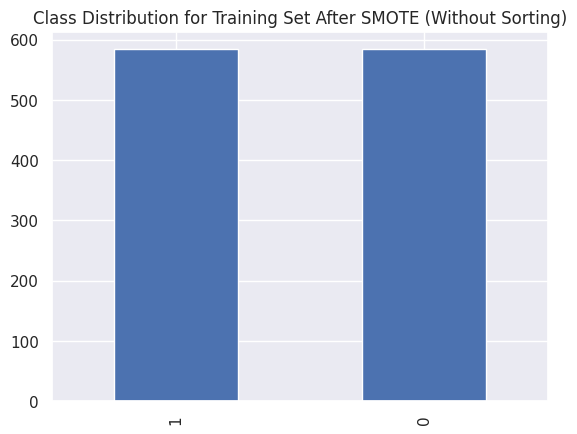

In [ ]:
y_train_series = pd.Series(y_train_smote)
print(y_train_series.value_counts())
y_train_series.value_counts().plot(kind="bar")
plt.title("Class Distribution for Training Set After SMOTE (Without Sorting)")

*Set 2: PCA & Feature selection added*

Data Splitting

In [ ]:
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_new, y, test_size=0.2, random_state=42)

In [ ]:
# classes after splitting
print(pd.Series(y_train2).value_counts())
print(pd.Series(y_test2).value_counts())

0    584
1    172
Name: win, dtype: int64
0    140
1     49
Name: win, dtype: int64


SMOTE

In [ ]:
# Apply SMOTE to the training set only
X_train_smote2, y_train_smote2 = smt.fit_resample(X_train2, y_train2)

In [ ]:
y_train2_series = pd.Series(y_train_smote2)
print(y_train2_series.value_counts())

1    584
0    584
Name: win, dtype: int64


PCA (Principal Component Analysis)


In [ ]:
from sklearn.decomposition import PCA

# Choose the number of components for PCA
n_components = 10
pca = PCA(n_components=n_components)

# Fit PCA on the training set
X_train_pca = pca.fit_transform(X_train_smote2)

# Transform the test set using the same PCA transformation
X_test_pca = pca.transform(X_test2)
print(X_test_pca)

[[-3.00777347e-01 -8.57935015e-02 -7.35538837e-02 ...  6.51719542e-02
   1.32242891e-02  3.37173285e-02]
 [ 1.76627101e-01 -4.11582976e-01 -2.39053057e-01 ... -1.42016514e-01
   2.83216740e-02  2.37603999e-02]
 [ 7.57732863e-01 -8.15779151e-02  2.37733299e-01 ...  9.60219456e-02
   4.17023114e-02  1.13512117e-02]
 ...
 [-2.87689790e-01 -6.56943822e-02 -5.07841815e-02 ...  7.55058879e-04
   1.16843292e-02  3.06669887e-02]
 [ 1.22092699e-02  4.87696681e-01 -1.15830123e-01 ... -1.71187604e-01
  -2.04663063e-02 -2.02576723e-02]
 [ 1.22525969e-01  8.66418288e-02 -2.09360597e-01 ...  2.80335048e-02
  -4.47111804e-03 -1.19367694e-02]]


Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Choose the number of top features to select
k_best = 5

# Select the top k features using f_classif score function
feature_selector = SelectKBest(f_classif, k=k_best)
X_train_selected = feature_selector.fit_transform(X_train_pca, y_train_smote2)
X_test_selected = feature_selector.transform(X_test_pca)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features from the original DataFrame
selected_features = X_train2.columns[selected_feature_indices]
print(selected_features)

Index(['total_draws', 'voting_percentage', 'majority_count', 'malay',
       'malay_percentage'],
      dtype='object')


**INSTALLING PACKAGES**

In [ ]:
!pip install imblearn

# **Models:**
<br>
1. Linear Regression
<br>
2. Logistic Regression
<br>
3. Random Forest

**WITHOUT USING PCA AND FEATURE SELECTION**

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


**Support Vector Machines**

Accuracy of SVM: 0.8306878306878307
Precision: 0.6164383561643836
Recall: 0.9183673469387755
F1-score: 0.7377049180327868
Confusion Matrix:
[[112  28]
 [  4  45]]
Support Vector Machine (SVM) Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       140
           1       0.62      0.92      0.74        49

    accuracy                           0.83       189
   macro avg       0.79      0.86      0.81       189
weighted avg       0.88      0.83      0.84       189



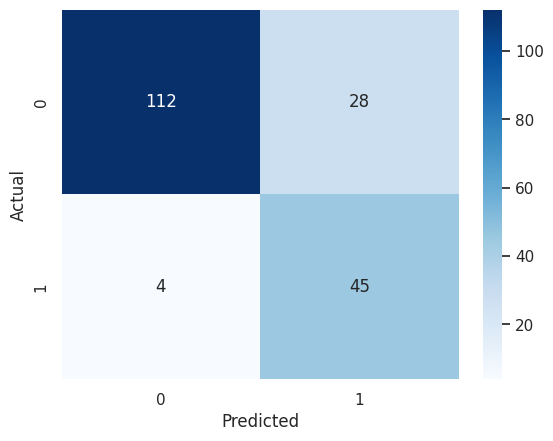

In [ ]:
# Train the SVM classifier on the resampled data
clf_SVM = SVC()
clf_SVM.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_test_SVM_pred = clf_SVM.predict(X_test)

# Evaluate the performance of the SVM model
SVM_acc = accuracy_score(y_test, y_test_SVM_pred)
SVM_confmat = confusion_matrix(y_test, y_test_SVM_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_SVM_pred)
recall = recall_score(y_test, y_test_SVM_pred)
f1 = f1_score(y_test, y_test_SVM_pred)

print('Accuracy of SVM:', SVM_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(SVM_confmat)

# Classification Report
print('Support Vector Machine (SVM) Classifier:')
print("Classification Report:\n", classification_report(y_test, y_test_SVM_pred))

# Visualization of Confusion Matrix
sns.heatmap(SVM_confmat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

Accuracy of Logistic Regression: 0.8571428571428571
Precision: 0.6527777777777778
Recall: 0.9591836734693877
F1-score: 0.7768595041322315
Confusion Matrix:
[[115  25]
 [  2  47]]
Logistic Regression Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       140
           1       0.65      0.96      0.78        49

    accuracy                           0.86       189
   macro avg       0.82      0.89      0.84       189
weighted avg       0.90      0.86      0.86       189



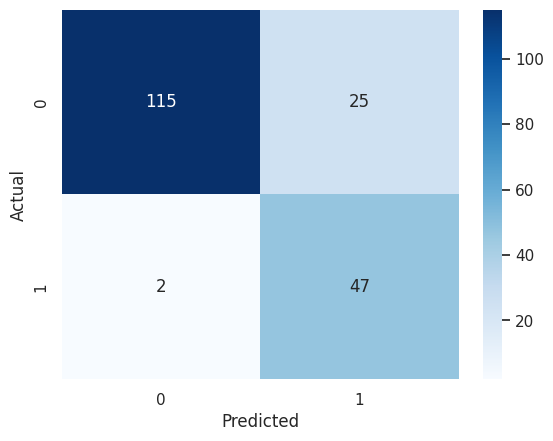

In [ ]:
# Train the Logistic Regression classifier on the resampled data
clf_LogR = LogisticRegression()
clf_LogR.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_test_LogR_pred = clf_LogR.predict(X_test)

# Evaluate the performance of the Logistic Regression model
LogR_acc = accuracy_score(y_test, y_test_LogR_pred)
LogR_confmat = confusion_matrix(y_test, y_test_LogR_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_LogR_pred)
recall = recall_score(y_test, y_test_LogR_pred)
f1 = f1_score(y_test, y_test_LogR_pred)

print('Accuracy of Logistic Regression:', LogR_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(LogR_confmat)

# Classification Report
print('Logistic Regression Classifier:')
print("Classification Report:\n", classification_report(y_test, y_test_LogR_pred))

# Visualization of Confusion Matrix
sns.heatmap(LogR_confmat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**

Accuracy of Random Forest: 0.8306878306878307
Precision: 0.7297297297297297
Recall: 0.5510204081632653
F1-score: 0.6279069767441859
Confusion Matrix:
[[130  10]
 [ 22  27]]
Random Forest Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       140
           1       0.73      0.55      0.63        49

    accuracy                           0.83       189
   macro avg       0.79      0.74      0.76       189
weighted avg       0.82      0.83      0.82       189



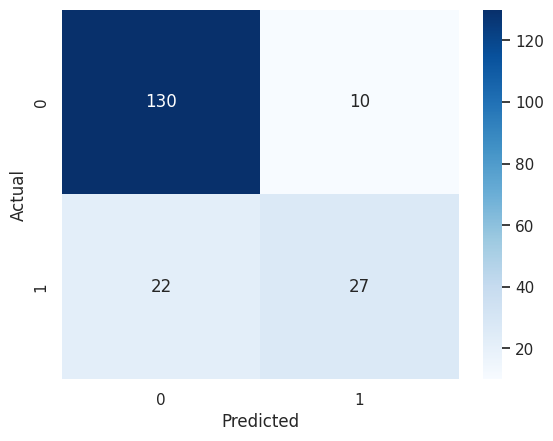

In [ ]:
# Train the Random Forest classifier on the resampled data
clf_RF = RandomForestClassifier(n_estimators=10, random_state=0)
clf_RF.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_test_RF_pred = clf_RF.predict(X_test)

# Evaluate the performance of the Random Forest model
RF_acc = accuracy_score(y_test, y_test_RF_pred)
RF_confmat = confusion_matrix(y_test, y_test_RF_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_RF_pred)
recall = recall_score(y_test, y_test_RF_pred)
f1 = f1_score(y_test, y_test_RF_pred)

print('Accuracy of Random Forest:', RF_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(RF_confmat)

# Classification Report
print("Random Forest Classifier:")
print("Classification Report:\n", classification_report(y_test, y_test_RF_pred))

# Visualization of Confusion Matrix
sns.heatmap(RF_confmat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**WITH USING PCA AND FEATURE SELECTION**

**Support Vector Machines**

Accuracy of SVM: 0.8677248677248677
Precision: 0.6764705882352942
Recall: 0.9387755102040817
F1-score: 0.7863247863247864
Confusion Matrix:
[[118  22]
 [  3  46]]
Support Vector Machine (SVM) Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90       140
           1       0.68      0.94      0.79        49

    accuracy                           0.87       189
   macro avg       0.83      0.89      0.85       189
weighted avg       0.90      0.87      0.87       189



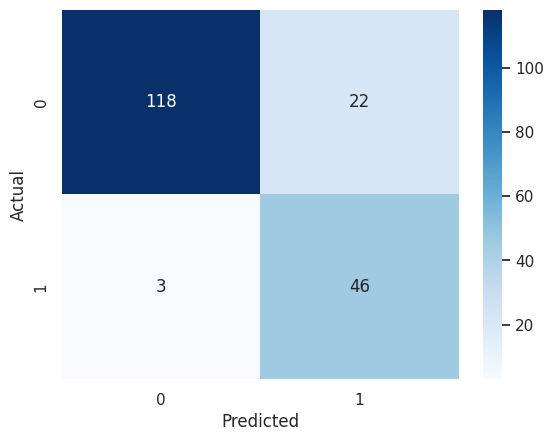

In [ ]:
# Train the SVM classifier on the resampled data
clf_SVM = SVC(kernel='linear', C=1.0)
clf_SVM.fit(X_train_selected, y_train_smote2)

# Make predictions on the test set
y_test_SVM_pred = clf_SVM.predict(X_test_selected)

# Evaluate the performance of the SVM model
SVM_acc = accuracy_score(y_test2, y_test_SVM_pred)
SVM_confmat = confusion_matrix(y_test2, y_test_SVM_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test2, y_test_SVM_pred)
recall = recall_score(y_test2, y_test_SVM_pred)
f1 = f1_score(y_test2, y_test_SVM_pred)

print('Accuracy of SVM:', SVM_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(SVM_confmat)

# Classification Report
print('Support Vector Machine (SVM) Classifier:')
print("Classification Report:\n", classification_report(y_test2, y_test_SVM_pred))

# Visualization of Confusion Matrix
sns.heatmap(SVM_confmat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Logistic Regression**

Accuracy of Logistic Regression: 0.8677248677248677
Precision: 0.6935483870967742
Recall: 0.8775510204081632
F1-score: 0.7747747747747746
Confusion Matrix:
[[121  19]
 [  6  43]]
Logistic Regression Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.91       140
           1       0.69      0.88      0.77        49

    accuracy                           0.87       189
   macro avg       0.82      0.87      0.84       189
weighted avg       0.89      0.87      0.87       189



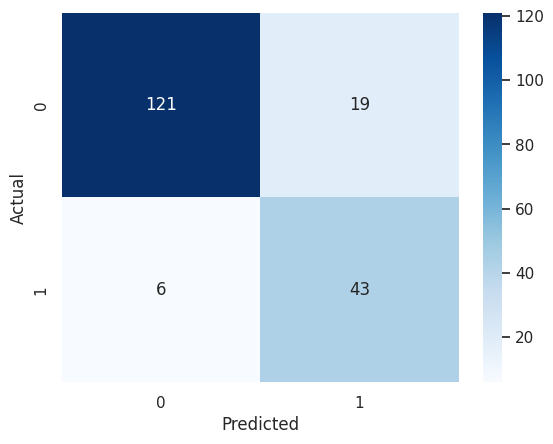

In [ ]:
# Train the Logistic Regression classifier on the resampled data
clf_LogR = LogisticRegression(C=1.0)
clf_LogR.fit(X_train_selected, y_train_smote2)

# Make predictions on the test set
y_test_LogR_pred = clf_LogR.predict(X_test_selected)

# Evaluate the performance of the Logistic Regression model
LogR_acc = accuracy_score(y_test2, y_test_LogR_pred)
LogR_confmat = confusion_matrix(y_test2, y_test_LogR_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test2, y_test_LogR_pred)
recall = recall_score(y_test2, y_test_LogR_pred)
f1 = f1_score(y_test2, y_test_LogR_pred)

print('Accuracy of Logistic Regression:', LogR_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(LogR_confmat)

# Classification Report
print('Logistic Regression Classifier:')
print("Classification Report:\n", classification_report(y_test2, y_test_LogR_pred))

# Visualization of Confusion Matrix
sns.heatmap(LogR_confmat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Random Forest**

Accuracy of Random Forest: 0.8571428571428571
Precision: 0.72
Recall: 0.7346938775510204
F1-score: 0.7272727272727272
Confusion Matrix:
[[126  14]
 [ 13  36]]
Random Forest Classifier:
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       140
           1       0.72      0.73      0.73        49

    accuracy                           0.86       189
   macro avg       0.81      0.82      0.82       189
weighted avg       0.86      0.86      0.86       189



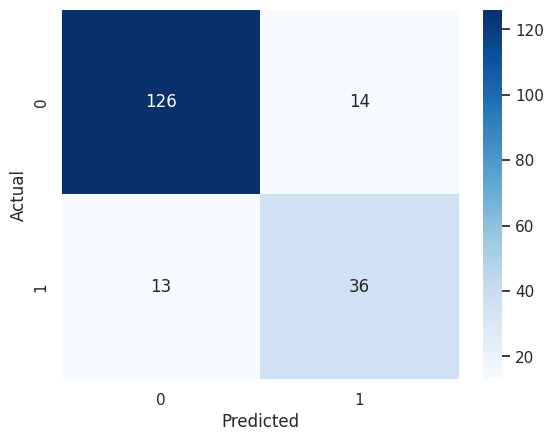

In [ ]:
# Train the Random Forest classifier on the resampled data
clf_RF = RandomForestClassifier(n_estimators=250, random_state=0)
clf_RF.fit(X_train_selected, y_train_smote2)

# Make predictions on the test set
y_test_RF_pred = clf_RF.predict(X_test_selected)

# Evaluate the performance of the Random Forest model
RF_acc = accuracy_score(y_test2, y_test_RF_pred)
RF_confmat = confusion_matrix(y_test2, y_test_RF_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test2, y_test_RF_pred)
recall = recall_score(y_test2, y_test_RF_pred)
f1 = f1_score(y_test2, y_test_RF_pred)

print('Accuracy of Random Forest:', RF_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:')
print(RF_confmat)

# Classification Report
print("Random Forest Classifier:")
print("Classification Report:\n", classification_report(y_test2, y_test_RF_pred))

# Visualization of Confusion Matrix
sns.heatmap(RF_confmat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Evaluations**

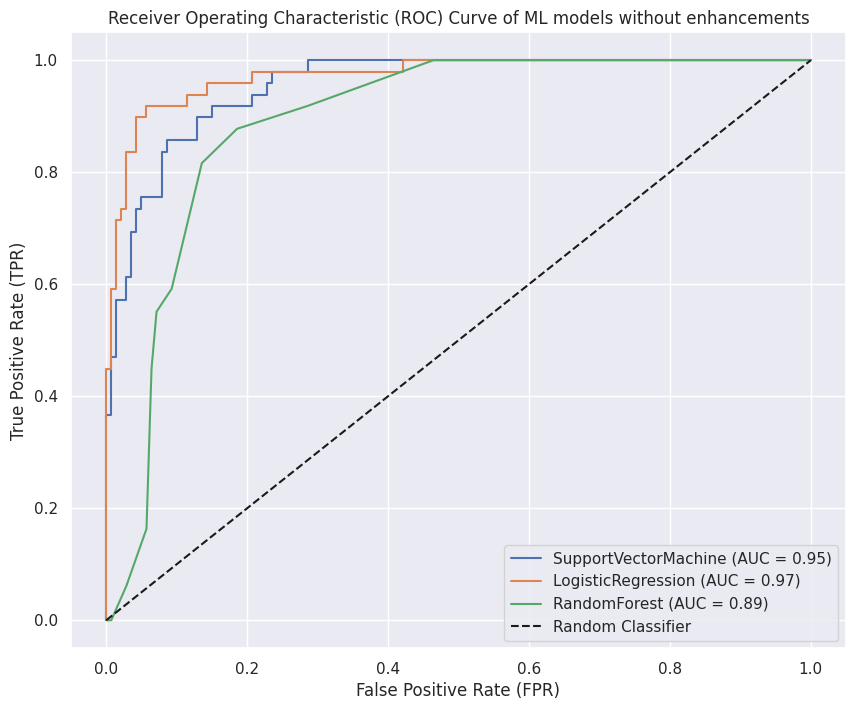

In [ ]:
from sklearn.metrics import roc_curve, auc

# Step 4: Define and train multiple models
models = {
    'SupportVectorMachine': SVC(probability=True).fit(X_train_smote, y_train_smote),
    'LogisticRegression': LogisticRegression().fit(X_train_smote, y_train_smote),
    'RandomForest': RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train_smote, y_train_smote)
}

# Step 5: Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():

    # Predict probabilities on the test set
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate false positive rate, true positive rate, and threshold
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve of ML models without enhancements')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()

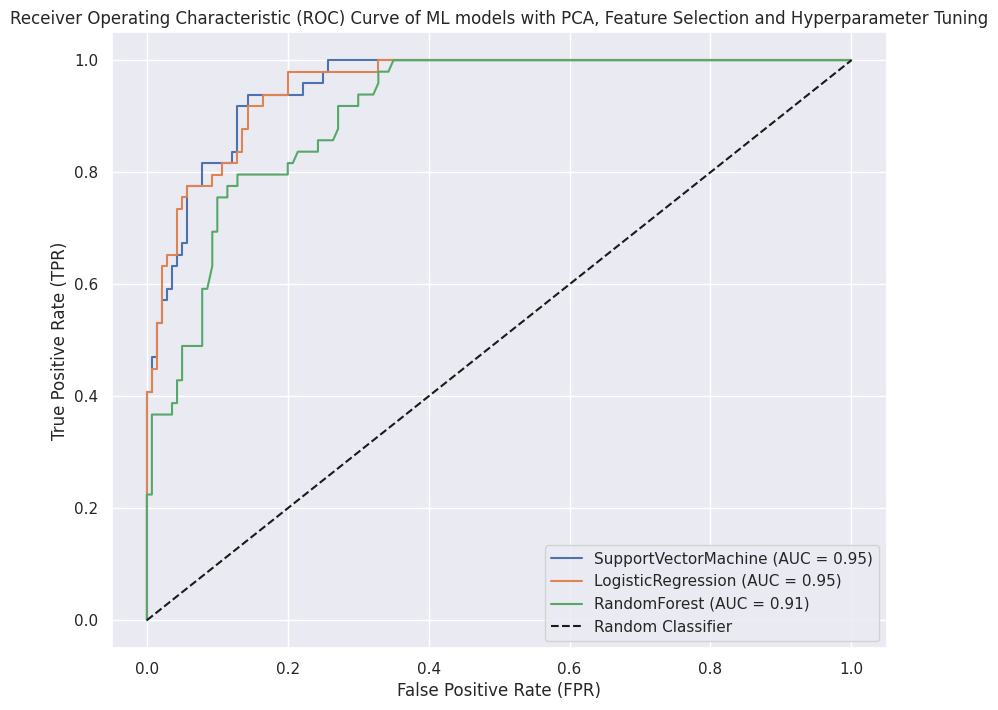

In [ ]:
from sklearn.metrics import roc_curve, auc

# Step 4: Define and train multiple models
models = {
    'SupportVectorMachine': SVC(kernel='linear', C=1.0, probability=True).fit(X_train_selected, y_train_smote2),
    'LogisticRegression': LogisticRegression(C=1.0).fit(X_train_selected, y_train_smote2),
    'RandomForest': RandomForestClassifier(n_estimators=250, random_state=0).fit(X_train_selected, y_train_smote2)
}

# Step 5: Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():

    # Predict probabilities on the test set
    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]

    # Calculate false positive rate, true positive rate, and threshold
    fpr, tpr, thresholds = roc_curve(y_test2, y_pred_prob)

    # Calculate AUC (Area Under the ROC Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Customize the plot
plt.title('Receiver Operating Characteristic (ROC) Curve of ML models with PCA, Feature Selection and Hyperparameter Tuning')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()